# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(citipy)

<module 'citipy.citipy' from '/Users/neelashivakumar/Documents/GitHub/Python-APIs-Homework/citipy/citipy.py'>


## Generate Cities List

In [2]:
today = f"{datetime.datetime.now():%m/%d/%y}"
print (today)

12/22/18


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [5]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | turan
Processing Record 5 of Set 1 | georgetown
City not found. Skipping...
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | warrington
Processing Record 10 of Set 1 | izhma
Processing Record 11 of Set 1 | port-gentil
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | hokitika
Processing Record 15 of Set 1 | avera
Processing Record 16 of Set 1 | tashtagol
Processing Record 17 of Set 1 | kortkeros
Processing Record 18 of Set 1 | kizilskoye
Processing Record 19 of Set 1 | richards bay
Processing Record 20 of Set 1 | crestline
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | naze
City not found. Skipp

Processing Record 183 of Set 1 | chernaya kholunitsa
Processing Record 184 of Set 1 | caxito
Processing Record 185 of Set 1 | voh
Processing Record 186 of Set 1 | paamiut
Processing Record 187 of Set 1 | pacifica
Processing Record 188 of Set 1 | igarka
Processing Record 189 of Set 1 | chuy
Processing Record 190 of Set 1 | sivaki
Processing Record 191 of Set 1 | saint anthony
Processing Record 192 of Set 1 | madawaska
Processing Record 193 of Set 1 | new ross
Processing Record 194 of Set 1 | bredasdorp
Processing Record 195 of Set 1 | karratha
Processing Record 196 of Set 1 | taree
Processing Record 197 of Set 1 | longyearbyen
Processing Record 198 of Set 1 | husavik
Processing Record 199 of Set 1 | vestmannaeyjar
Processing Record 200 of Set 1 | nyuksenitsa
Processing Record 201 of Set 1 | qinzhou
Processing Record 202 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 203 of Set 1 | alyangula
Processing Record 204 of Set 1 | mercedes
Processing Record 205 of Set 1 | p

Processing Record 365 of Set 1 | san martin
Processing Record 366 of Set 1 | tateyama
Processing Record 367 of Set 1 | ankang
Processing Record 368 of Set 1 | bell ville
Processing Record 369 of Set 1 | madang
Processing Record 370 of Set 1 | camacari
Processing Record 371 of Set 1 | coahuayana
Processing Record 372 of Set 1 | dunedin
Processing Record 373 of Set 1 | chatrapur
Processing Record 374 of Set 1 | constitucion
Processing Record 375 of Set 1 | walvis bay
Processing Record 376 of Set 1 | verkhnevilyuysk
Processing Record 377 of Set 1 | lamar
Processing Record 378 of Set 1 | okha
Processing Record 379 of Set 1 | san pedro
Processing Record 380 of Set 1 | pinheiro
Processing Record 381 of Set 1 | oistins
Processing Record 382 of Set 1 | ibra
Processing Record 383 of Set 1 | omsukchan
Processing Record 384 of Set 1 | jandaia do sul
Processing Record 385 of Set 1 | port blair
Processing Record 386 of Set 1 | graaff-reinet
Processing Record 387 of Set 1 | bilma
Processing Record 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

# print lengh of each list 
print(f'City          {len(City)}')
print(f'Cloudiness    {len(Cloudiness)}')
print(f'Country    {len(Country)}')
print(f'Date    {len(Date)}')
print(f'Humidity    {len(Humidity)}')
print(f'Lat    {len(Lat)}')
print(f'Lng    {len(Lng)}')
print(f'Max Temp    {len(Max_Temp)}')
print(f'Wind Speed    {len(Wind_Speed)}')

City          537
Cloudiness    537
Country    537
Date    537
Humidity    537
Lat    537
Lng    537
Max Temp    537
Wind Speed    537


In [7]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Arraial do Cabo,8,BR,1545526084,87,-22.97,-42.02,26.38,3.90
1,Nanortalik,92,GL,1545526084,89,60.14,-45.24,0.18,2.65
2,Hermanus,0,ZA,1545526084,99,-34.42,19.24,13.80,1.30
3,Turan,20,RU,1545526084,66,52.15,93.92,-27.55,0.85
4,Georgetown,75,GY,1545523200,74,6.80,-58.16,27.00,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

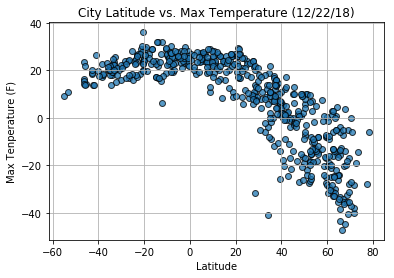

In [8]:
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Tenperature (F)")

plt.scatter(Lat, Max_Temp, marker="o", alpha=.75, edgecolors="k")
plt.savefig('max_temperature')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

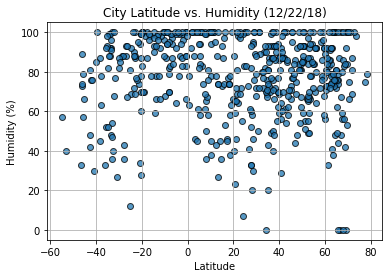

In [9]:
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('humidity')

plt.scatter(Lat, Humidity, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

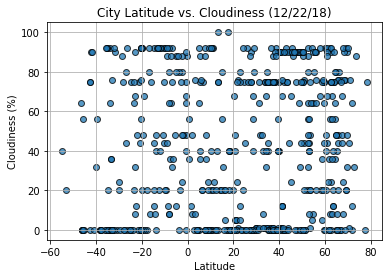

In [10]:
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('cloudiness')

plt.scatter(Lat, Cloudiness, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

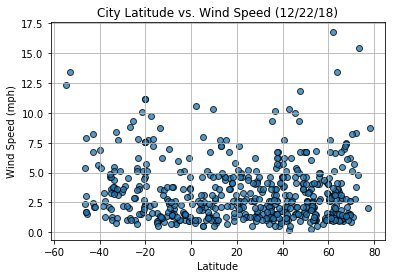

In [11]:
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('wind_speed')

plt.scatter(Lat, Wind_Speed, alpha=.75, edgecolors="k")
plt.grid()
plt.show()